# Elementos de FPGA asociados a DSP

**En sistemas digitales (FPGA y ASIC) tenemos distintos bloques que nos van a hacer las cosas mas faciles para la implementacion de nuestros sistemas:**
* Bloques DSP
* Registros de desplazamientos
* FF y LUTS
* Logica de acarreo

![clase-3-1](./clase-3-1.png)

This architecture supports:
* Multiply 
* Multiply accumulate  (MACC) 
* Multip ly a dd •Four-i nput a dd 
* Barrel shift 
* Wide-bus multiplexing 
* Magnitude comparator 
* Bitwise logic  functions 
* Wide X OR 
* Pattern detect 
* Wide counter

![clase-3-2](./clase-3-2.png)
![clase-3-3](./clase-3-3.png)

![clase-3-4](./clase-3-4.png)
![clase-3-5](./clase-3-5.png)
![clase-3-6](./clase-3-6.png)
![clase-3-7](./clase-3-7.png)

## Hay que tener en cuenta este factor para mejorar la velocidad de procesamiento.


# ¿Que podemos implementar en un FPGA?
![clase-3-9](./clase-3-9.png)

* Trabajar exclusivamente con señales digitales.
* Se puede multiplicar por una constante.
* Se puede atrasar las señales N ciclos de reloj utilizando 

## Convenciones
![clase-3-8](./clase-3-8.png)

* Branch Node: envía una copia de la señal de entrada a varias rutas de salida
* Summing Node: genera la suma de todas las señales que fluyen hacia él.
* Elemento de retardo: almacena una muestra retardada de la señal de entrada.

# Transformada Z

En DSP utiliza la transformada z para operar en señales muestreadas en tiempo discreto, a diferencia de las transformadas de Laplace y Fourier utilizadas para señales analógicas en tiempo continuo. Los diseñadores de hardware utilzian la notación estándar, $ z^{-1}$ para un retardo de muestra unitaria, comúnmente implementado con un registro. 

Esto se refiere a una propiedad importante de la transformada z: un retardo en el dominio del tiempo corresponde a la transformada z de la señal sin retardo, multiplicada por una potencia de z en el dominio de la frecuencia. La expresión de esta relación entre una señal retardada por k muestras unitarias y su transformada z es:

$$ x(n-k) <-->  z^{-k}.X(z) $$


Para una señal x(n), la transformada Z bilateral se define como:

$$ X(z) = \sum_{n= -\infty}^{\infty} x(n) z^{-n} $$

* Esto se considera en la literatura como una serie de potencia.
* z es una variable compleja. El plano complejo tambien se conoce como plano z.

Se define la ROC o region de convergencia como **El set de todos los valores en los cuales X(z) tiene un valor finito**.

z $\epsilon$ C : $\sum_{n=-\infty}^{\infty}\vert x(n).z^{-n} \vert$ $<\infty$

## Transformadas Z básicas

$ x(n) = \delta(n)$ . $T[x(z)] = 1$ y la ROC incluye todo el plano complejo.

$ x(n) = \delta(n-k)$ . $T[x(z)] = z^{-k}$ 

Si k = 0, la ROC es todo el plano Z.

Si k > 0, la ROC es todo el plano z menos el ${0}$.

Si k < 0, la ROC es todo el plano z menos el ${\infty}$.

Otra señal: $x(n) = p^n.u(n)$

$X(z) = \sum_{n=0}^{\infty}.p^{n}.z^{-n} = \sum_{n=0}^{\infty}(p.z^{-1})^n = 1 + \frac{p}{z} + (\frac{p}{z})^2 + + (\frac{p}{z})^n = \frac{1}{1 - p.z^{1}} $ , esto sucede si y solo si $\vert p.z^-1 \vert < 1 $ o sea $\vert z \vert > \vert p \vert$

![PDS_CLASE_R_1_28](./PDS_CLASE_R_1_28.PNG)

Condicioón región de convergencia:
* Puede demostrarse que la ROC de un sistema causal es el exterior de un circulo r en el plano complejo.
* Puede demostrarse que la ROC de un sistema no causal es el interior de un circulo r en el plano complejo.

### Una de las mayores utilidades de la transformada Z es ver la estabilidad de un sistema

Que un sistema LTI sea estable implica $ \sum_{-\infty}^{\infty}\vert h(n) \vert < \infty $ 

La transformada z de esa respuesta impulsiva es: $\sum_{-\infty}^{\infty}\vert h(n)z^{-n} \vert$

Vemos que la condición de estabilidad coincide con la transformada Z si $\vert z \vert = 1 $

### Por lo tanto un sistema es estable si y solo si  la region de convergencia de H(z) incluye el circulo unitario

## Sistemas LTI con transformada Z racionales
Existen sistemas LTI que tienen transformadas Z que no son racionales, pero como caso practico los sistemas mas faciles de implementar son los racionales y son los que se estudian.

Si $x(n)$ es la entrada a un sistema LTI con una respuesta impulsiva $h(n)$, entonces la salida $y(n) = h(n)*x(n)$, entonces $Y(z)=H(z).X(z)$


### Los sistemas racionales surgen de ecuasiones de diferencias con el siguiente formato:
La salida es un combinacion lineal de las entradas y las salidas previas.

$$ y(n) = \sum_{k=0}^{M-1}.b_k.x(n-k) - \sum_{k=1}^{N-1}a_k.y(n-k) $$

Aplicamos transformada Z. Por motivos practicos el sistema tambien es causal.

$$ Y(z) = \sum_{k=0}^{M-1}.b_k.z^{-k}.X(z) - \sum_{k=1}^{N-1}a_k.z^{-k}.Y(Z) $$

Esto se puede agrupar y escribir de la siguiente manera:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M-1}.b_k.z^{-k}}{1 + \sum_{k=1}^{N-1}a_k.z^{-k}} = \frac{B(z)}{A(z)} $$

* Los ceros de H(z) son los valores en los cuales se hace 0. Por lo tanto son las raise del numerador.
* Los polos de H(z) son los valores en los cuales se hace $\infty$. Por lo tanto son las raise del denominador.

Las funcion de transferencia puede factorizarse como:

$$ H(z) = \frac{B(z)}{A(z)} = \frac{\prod_k(z - z_k)}{\prod_k(z - p_k)} $$

**Como sabemos la ROC no puede incluir valores donde H(z) se haga infinita con lo cual por definición no puede incluir los polos**

**Para sistemas LTI causales, los polos tienen que estar dentro del circulo unitario, tener en mente que la ROC para sisatemas causales son los z con $\rho$ > r_1**
**Los sistemas estables tienen que tener al circulo unitario en la ROC**.


## Algunos sistemas LTI particulares  con formato racional:

### Sistemas todos zeros:

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{1}{{z^M}}\sum_{k=0}^{M-1}.b_k.z^{M-k}= \frac{\prod_{k=1}^{M}z-z_k}{z^M} $$

Este tipo de sistemas tienen M polos triviales en el origen. Como estos estan en el origen no afectan a la respuesta en frecuencia. 
Puede decirse que el numerador tiene M raices que no son ceros triviales. La respues impulsiva de estos sistema siempre es FIR:

$$ h(n) = \sum_{k=0}^{N}b_k.\delta(n-k) $$

### Sistemas todos polos:
Si M = 0 o sea que $b_1 = ...... = b_M = 0$ entonces el sistema se reduce a:


 $$ H(z) = \frac{b_0}{1 + \sum_{k=1}^{N}a_k.z^{-k}} = \frac{b_0.z^N}{\sum_{k=0}^{N}a_k.z^{N-k}} = b_0.\frac{z^N}{\prod_{k=1}^{N}(z-p_k)} $$


Este sistema tiene N ceros triviales en z = 0 que son de nula importancia y el denominador es un polinomio con N raices que son los polos de H(z).
**Las respuesta de estos sistemas LTI es siempre IIR**

Calcular la respuesta impulsiva no es tan trivial como un sistema de todos zeros. Hay que hacer fracciones parciales y utilizar antitransformadas conocidas

![PDS_CLASE_R_1_29](./PDS_CLASE_R_1_29.PNG)

### Cualquier otra combinación de polos y zeros siempre seria un sistema IIR.

## Transformada Z y analisis en frecuencia

Como habiamos la transformada z de un respuesta impulsiva puede escrbirse como:

$H(z) = \sum_{n=-\infty}^{\infty}x(n).z^{-n}$, con una ROC que puede estar entre $r_2 < \vert z \vert < r_1 $

Como variable compleja puede pensarse como:

$$ z = r.e^{j.w} $$

Entonces si el circulo unitario esta dentro $\vert r \vert = 1$ de la región de convergencia:

$$ X(z = e^{jw}) = H(w) = \sum_{n=-\infty}^{\infty}{h(n).e^{-jwn}} $$

Lo cual equivale a la definición anterior de la respuesta en frecuencia para un sistema LTI.

![PDS_CLASE_R_1_30](./PDS_CLASE_R_1_30.PNG)

# ¿Como podemos trabajar con Transformada Z?
Tenemos la siguiente ecuación de diferencia que representa un sistema digital LTI:

 $$ y(n) = 0.75.y(n-1) + x(n) + x(n-1)  $$
 
En lógica programable los retrasos se mapean como FF o elementos de memoria.
Para los sistemas digitales la propiedad de corrimiento en tiempo de la transformada Z:
 
 $$ x(n-k) <------> z^{-k}X(z) $$
 
Realizamos la transformada Z a ambos lados de la igualdad.
 
 $$ Y(z) = 0.75.z^{-1}.Y(z) + X(z) + z^{-1}.X(z)  $$
 
 $$ Y(z).(1 - 0.75.z^{-1}) = X(z).(1 + z^{-1})  $$
 
 $$ \frac{Y(z)}{X(z)} = H(z) =\frac{1 + z^{-1}}{1 - 0.75.z^{-1}} = \frac{N(z)}{D(z)}  $$
 
Para saber el funcionamiento del sistema podemos calcular las singularidades de N(Z) y D(Z)

**Calculamos las singularidades de los polinomios N(z) y D(z)**. 
Las raices de **N(z)** son los ceros. Las raices de **D(z)** son los polos.
* En las bibliografía los coeficiente de **N(z)** tambien se conoce como **b**.
* En las bibliografía los coeficiente de **D(z)** tambien se conoce como **a**.


b = $[1,1]$

a = $[1,-0.75]$

Con la función *roots* de numpy podemos sacar las singularidades.

Recordar que para un polinomio de coefciente reales las raices son reales, o complejas conjugadas.

In [ ]:
import numpy as np
#Primero describimos a los polinomios.
b = [1,1]    
a = [1,-0.75]

#Polos y ceros
p = np.roots(a)
z = np.roots(b)

print("El polo esta ubicado en z = {}".format(p[0]))
print("El zero esta ubicado en z = {}".format(z[0]))

El polo esta ubicado en z = 0.75
El zero esta ubicado en z = -1.0


In [ ]:
#Declaracion de importaciones y de la funcion para dibujar el zplane
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams

#No tenemos zplane declara da con lo cual directamnete ubicamos esta implementacion en stackoverflow.
# No ta buscar si hau algo maejor documentado
def zplane(b,a,filename=None):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

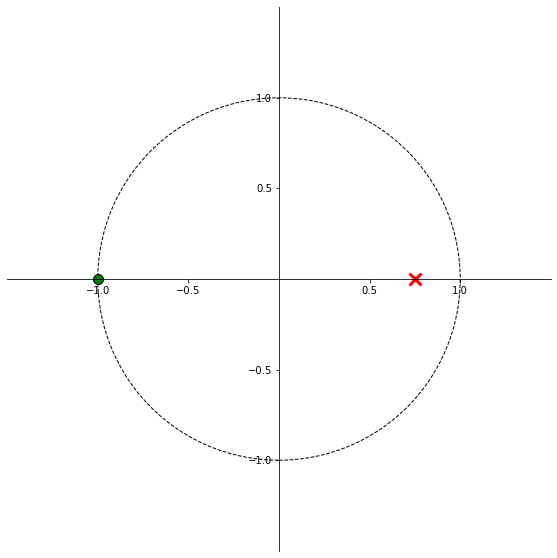

In [ ]:
#Teniendo como parametro a b y a que son los polinomios 
fig = plt.figure(figsize=(10,10))
z,p,k=zplane(b,a)

Una vez tenida la transformada Z y sus polinomios b,a podemos calcular su respuesta en frecuencia.
En python tenemos la función **freqz** de numpy. 

Esta funcion evalua la función de transferencia en el circulo unitario $ e^{jw} $

![PDS_CLASE_4_1](./PDS_CLASE_4_1.PNG)
[Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html)

Recordar que la respuesta en frecuencia nos vas a dar la respuesta del sistema para disintas excitaciones armónicas.}

Tambien tener en mente que el resultado es complejo, con locual para hacer un gráfico siempre es necesario obtener maginitud y fase.

Cantidad de puntos calculados:512
Cantidad de puntos calculados:8192


(-0.1570604579196411,
 3.298269616312463,
 -0.39976990287908354,
 8.399989042994243)

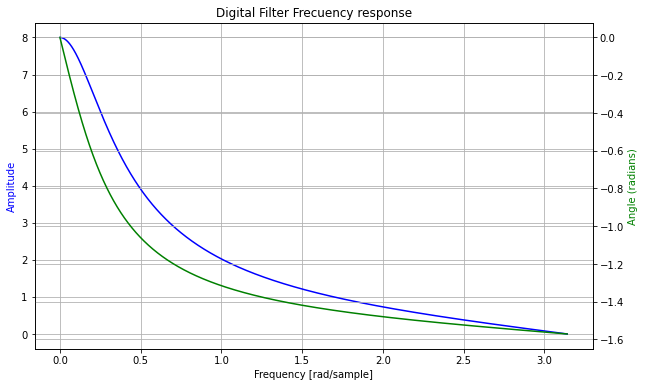

In [ ]:
from scipy import signal
#Sacamos la respuesta en frecuencia

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a)
#Como esta respuesta en teoría es continua, podemos obtener infinitos puntos.
print("Cantidad de puntos calculados:{}".format(np.size(w)))

#Calculo de la respuesta en frecuencia
w , h = signal.freqz(b,a,worN=8192)
#Como esta respuesta en teoría es continua, podemos obtener infinitos puntos.
print("Cantidad de puntos calculados:{}".format(np.size(w)))

#Dibujamos la respuesta en Frecuencia y la Fase en el mismo grafico
fig,ax1 = plt.subplots(figsize=(10,6))
ax1.set_title('Digital Filter Frecuency response')
ax1.plot(w, (abs(h)), 'b')
ax1.set_ylabel('Amplitude', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax1.grid()
ax2.grid()
ax1.axis('tight')

Algunas aclaraciones del sistema lineal anteior.
* Tener en cuenta que esta transferencia es IIR ya que tiene polos y su respuesta al impulso es infinita.
* El metodo que habiamos visto de la convolución con la respuesta al impulso parece inviable para este sistema.

Por lo tanto  en Python tenemos metodos para realizar el filtrado de una señal cualquiera sea una vez obtenida la transformada Z de un sistema.
Esta esta en scipy y es **lfilter** tener en cuenta que como antes tenemos que pasar los polinomios de b y a.

[Link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)

El tamaño de la señal de salida= 512


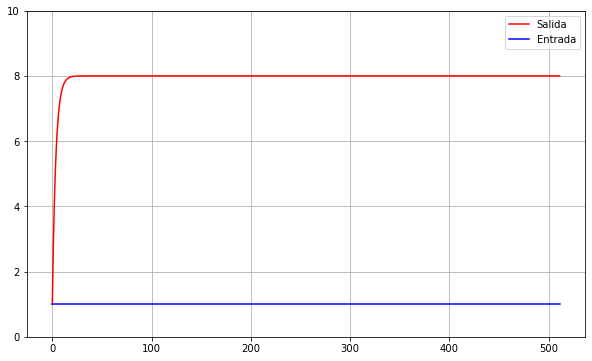

In [ ]:
#Excitemos el sistema con una continua, para nuestro caso de lo que vimos de la respuesta en frecuencia deberia amplificar 8 veces.

#Tomemos 512 muestros.
N = 512
xx = np.ones(512)
#Esta funcion permite que uno pueda indicarle las condiciones iniciales.
yy = signal.lfilter(b,a,xx)

print("El tamaño de la señal de salida= {}".format(np.size(yy)))

plt.subplots(figsize=(10,6))
plt.plot(yy,'r')
plt.grid()
plt.plot(xx,'b')
plt.ylim(0,10)
plt.legend(['Salida','Entrada'])


**Al principio tenemos un transitorio. Podemos configurar lfilter para tener distintas condiciones iniciales y de esta manera obtener distintos transitorios. Eventaulmente este se extingue y la salida del sistema queda determinada como lo que obtuvimos de la H($e^{jw}$)**

Por ejemplo trabajemos para w = 1.0, esperamos que en amplitud el filtro amplifique **2 veces aproximadamente**.

![PDS_CLASE_4_2](./PDS_CLASE_4_2.PNG)

El tamaño de la señal de salida= 512
RMS INPUT: 0.71 RMS OUTPUT: 1.43 OUTPUT/INPUT = 2.03


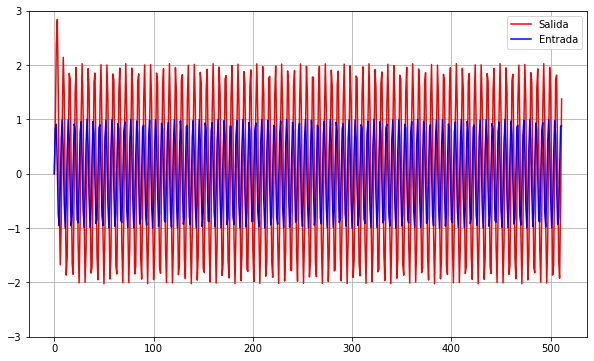

In [ ]:
#Tomemos 512 muestros.
N = 512
tt = np.linspace(0,N,N,endpoint=False)
xx = np.sin(1.0*tt)
#Esta funcion permite que uno pueda indicarle las condiciones iniciales.
yy = signal.lfilter(b,a,xx)

print("El tamaño de la señal de salida= {}".format(np.size(yy)))

plt.subplots(figsize=(10,6))
plt.plot(yy,'r')
plt.grid()
plt.plot(xx,'b')
plt.ylim(-3,3)
plt.legend(['Salida','Entrada'])

#Una buena manera de calcular como sabemos que tenemos solo un tono a la salida podemos sacar el valor rms.
rms_input  = np.sqrt(np.mean(xx**2))
rms_output = np.sqrt(np.mean(yy**2))

print("RMS INPUT: %2.2f RMS OUTPUT: %2.2f OUTPUT/INPUT = %2.2f" % (rms_input,rms_output,rms_output/rms_input))

# Tambien podemos trabajar con PYFDA

**Supongamos que tenemos la siguiente transferencia dada en diagrama en bloques:**
![PDS_CLASE_R_1_31](./PDS_CLASE_R_1_31.PNG)
    

**Podemos ingresar directamente en Pyfda y en modo manual configurar como es la cadena de entrada, tocando los coeficientes del polinomio b.**
![PDS_CLASE_R_1_32](./PDS_CLASE_R_1_32.PNG)
![PDS_CLASE_R_1_33](./PDS_CLASE_R_1_33.PNG)

### Estos filtros son conocidos como filtros comb o filtros peine.